In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1 Загрузите данные из файла «weather1.csv» о погоде в Перми
weather = pd.read_csv("drive/MyDrive/weather1.csv", sep = ';', usecols = ['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV'])
weather.head(5)

,Местное время в Перми,T,P,U,Ff,N,H,VV
0,31.12.2021 23:00,-9.8,762.5,83,3,100%.,600-1000,4.0
1,31.12.2021 20:00,-10.6,764.2,81,3,100%.,1000-1500,4.0
2,31.12.2021 17:00,-11.6,765.5,79,2,"90 или более, но не 100%",1000-1500,10.0
3,31.12.2021 14:00,-11.9,766.7,77,1,100%.,1000-1500,20.0
4,31.12.2021 11:00,-13.6,767.5,79,1,100%.,1000-1500,10.0


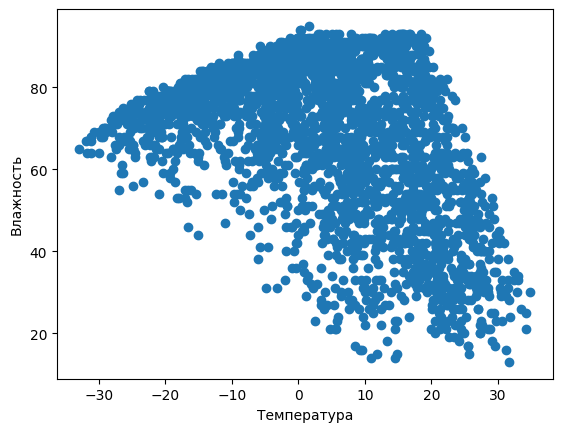

In [ ]:
# 2 Постройте точечную диаграмму (диаграмму рассеяния) по признакам температуры и относительной влажности
plt.scatter(x = weather[['T']], y = weather[['U']])
plt.xlabel('Температура')
plt.ylabel('Влажность');

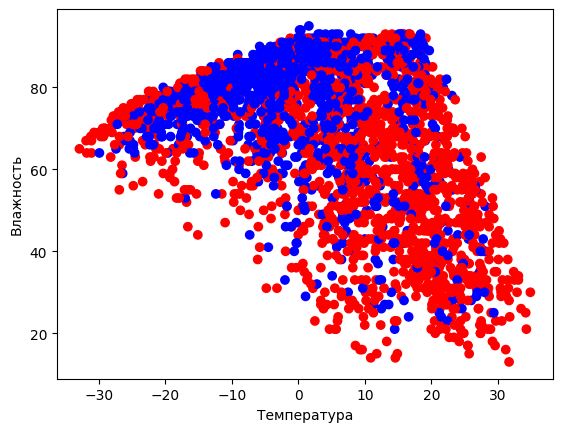

In [ ]:
# 3 На построенной в предыдущем пункте диаграмме выделите точки разными цветами в зависимости от облачности:
# синим – для которых облачность составляет 100%, красным – все остальные
plt.scatter(x = weather[['T']], y = weather[['U']], c = pd.Series(weather['N'] == '100%.').replace({False: 'red', True: 'blue'}))
plt.xlabel('Температура')
plt.ylabel('Влажность');

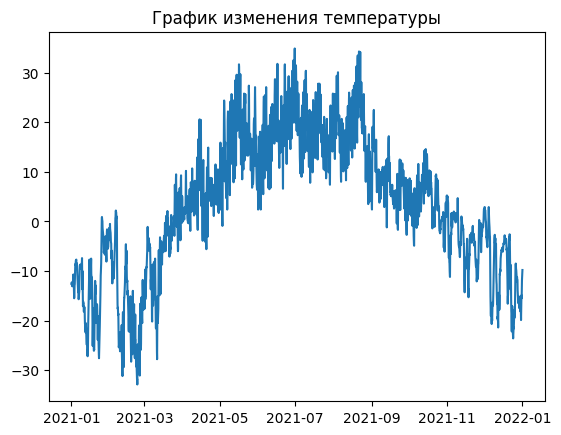

In [ ]:
# 4 Постройте линейную диаграмму (график) изменения температуры в зависимости от местного времени
weather['Местное время в Перми'] = pd.to_datetime(weather['Местное время в Перми'], dayfirst = True)
plt.plot(weather['Местное время в Перми'], weather['T'])
plt.title('График изменения температуры');

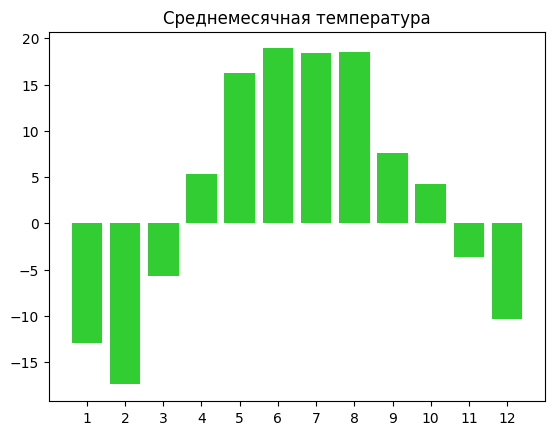

In [ ]:
# 5 Посчитайте по имеющимся данным среднемесячную температуру и постройте столбчатую диаграмму (вертикальную) зависимости средней температуры от месяца
weather['Месяц'] = pd.DatetimeIndex(weather['Местное время в Перми']).month
mt = weather.groupby('Месяц').agg(avg_temp = ('T', 'mean')).reset_index()
plt.bar(mt['Месяц'], mt['avg_temp'], color = 'limegreen')
plt.xticks(mt['Месяц'])
plt.title('Среднемесячная температура');

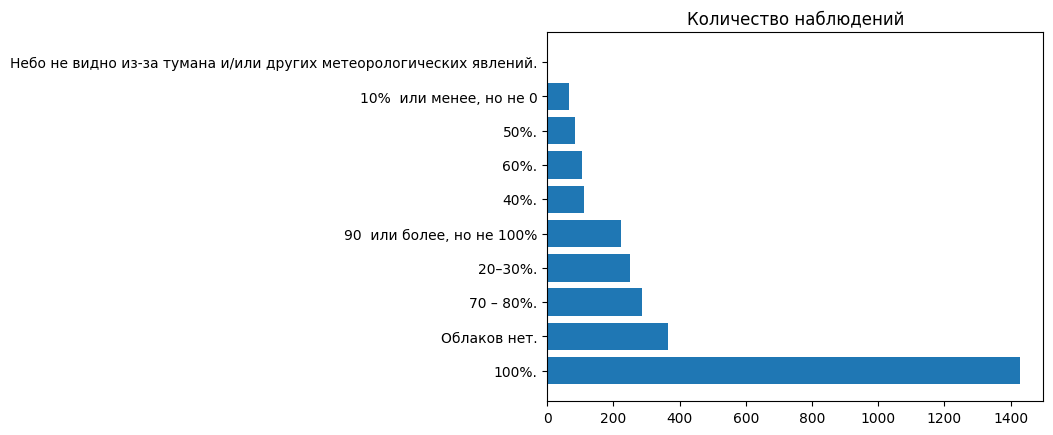

In [ ]:
# 6 Постройте ленточную диаграмму (горизонтальную), отразив на ней количество имеющихся наблюдений для каждого варианта облачности
cn = weather['N'].value_counts().reset_index()
plt.barh(cn['N'], cn['count'])
plt.title('Количество наблюдений');

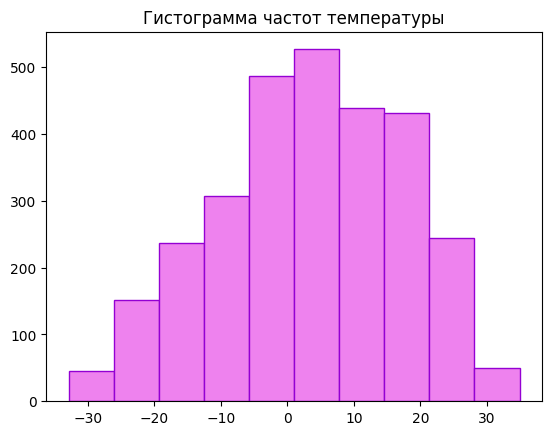

In [ ]:
# 7 Постройте гистограмму частот для температуры
# На гистограмме должно быть 10 диапазонов температуры
plt.hist(weather[['T']], color = 'violet', edgecolor = 'darkviolet')
plt.title('Гистограмма частот температуры');

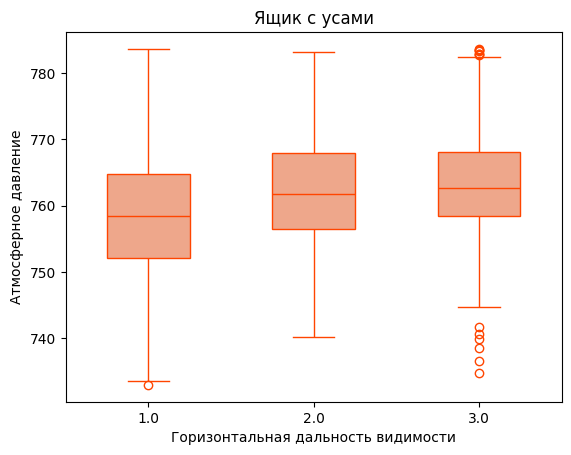

In [ ]:
# 8 Разбейте данные на 3 группы по значению горизонтальной дальности видимости
# (одна группа – дальность видимости менее 5 км, вторая – от 5 до 15 км (включительно), третья – более 15 км)
# В одной области для каждой группы постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное давление»
def make_groups(x):
  if(x < 5):
    return 1
  elif(x >= 5 and x <= 15):
    return 2
  elif(x > 15):
    return 3

weather['GroupVV'] = weather['VV'].apply(make_groups)

sns.boxplot(x = weather['GroupVV'], y = weather['P'], color = 'lightsalmon', linecolor = 'orangered', width = 0.5)
plt.xlabel('Горизонтальная дальность видимости')
plt.ylabel('Атмосферное давление')
plt.title("Ящик с усами");

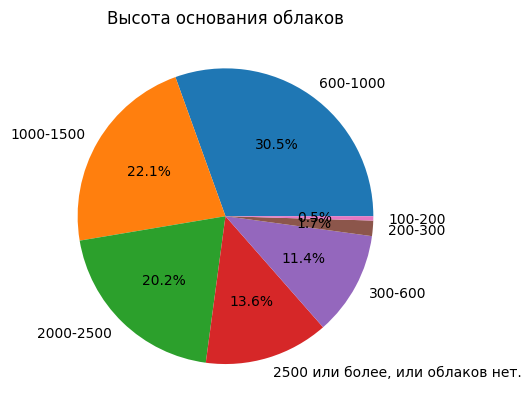

In [ ]:
# 9 Постройте круговую диаграмму для признака «высота основания облаков»
hc = weather['H'].value_counts().reset_index()
plt.title('Высота основания облаков')
plt.pie(hc['count'], labels = hc['H'], autopct = "%1.1f%%");